Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [x] Continue to participate in our Kaggle challenge.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [x] Try Ordinal Encoding.
- [x] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [x] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '/Users/keila/Documents/Lambda/Units_Git/DS-Unit-2-Kaggle-Challenge/data/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

import category_encoders
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder, TargetEncoder, CountEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

## Wrangle Data

In [3]:
def wrangle(fm_path, tv_path = None):
    # Import CSV files
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path, 
                                   na_values = [0, -2.000000e-08],
                                   parse_dates = ['construction_year', 'date_recorded']),
                       pd.read_csv(tv_path)).set_index('id')
    else:
        df = pd.read_csv(fm_path, na_values=[0, -2.000000e-08], 
                     parse_dates = ['construction_year', 'date_recorded']).set_index('id')
    
    # Feature engineering (Credit: Mena)
    df['pump_age'] = df['date_recorded'].dt.year - df['construction_year'].dt.year
    
    # Drop constant and repeated columns
    df.drop(columns = ['recorded_by', 'extraction_type_group', 'extraction_type_class',
                       'quantity_group','date_recorded', 'construction_year', 'payment',
                       'source', 'waterpoint_type_group'], 
            inplace=True)
    
    # Drop columns with high % of NaN values
    df.dropna(axis = 1, thresh = len(df) * 0.6, inplace = True)
    
    return df

In [4]:
train = wrangle(fm_path = DATA_PATH+'waterpumps/train_features.csv', 
                tv_path = DATA_PATH+'waterpumps/train_labels.csv')
print(train.shape)
train.head()

(59399, 29)


,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,...,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,pump_age
id,,,,,,,,,,,,,,,,,,,,,
69572.0,Roman,1390.0,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,...,user-group,annually,soft,good,enough,spring,groundwater,communal standpipe,functional,12.0
8776.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,...,user-group,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,3.0
34310.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,...,user-group,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional,4.0
67743.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,user-group,never pay,soft,good,dry,borehole,groundwater,communal standpipe multiple,non functional,27.0
19728.0,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,...,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 59399 entries, 69572.0 to 26348.0
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funder             54987 non-null  object 
 1   gps_height         38962 non-null  float64
 2   installer          54967 non-null  object 
 3   longitude          57587 non-null  float64
 4   latitude           57587 non-null  float64
 5   wpt_name           59399 non-null  object 
 6   basin              59399 non-null  object 
 7   subvillage         59028 non-null  object 
 8   region             59399 non-null  object 
 9   region_code        59399 non-null  int64  
 10  district_code      59376 non-null  float64
 11  lga                59399 non-null  object 
 12  ward               59399 non-null  object 
 13  population         38019 non-null  float64
 14  public_meeting     56066 non-null  object 
 15  scheme_management  55522 non-null  object 
 16  permit      

In [55]:
# How I decided to delete waterpoint_type_group
# train[train['waterpoint_type'] != train['waterpoint_type_group']]

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,...,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,pump_age
id,,,,,,,,,,,,,,,,,,,,,
34310.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,...,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,communal standpipe,functional,4.0
67743.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,never pay,soft,good,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27.0
9944.0,Mkinga Distric Coun,NaN,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,Tanga,4,...,per bucket,salty,salty,enough,other,unknown,communal standpipe multiple,communal standpipe,functional,2.0
32376.0,Government Of Tanzania,NaN,Government,NaN,NaN,Polisi,Lake Victoria,Center,Mwanza,19,...,unknown,unknown,unknown,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,NaN
68724.0,Muwsa,766.0,MUWSA,37.348169,-3.356538,Environment,Pangani,Dhobi Street,Kilimanjaro,3,...,per bucket,soft,good,insufficient,spring,groundwater,communal standpipe multiple,communal standpipe,non functional,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29915.0,Isf,834.0,DWE,29.749577,-4.899134,Shule Ya Msingi Muhamani,Lake Tanganyika,Kaskazini,Kigoma,16,...,unknown,soft,good,enough,river/lake,surface,communal standpipe multiple,communal standpipe,non functional,4.0
68576.0,Isf,962.0,DWE,29.729909,-4.801508,Tupendane,Lake Tanganyika,Kabanga,Kigoma,16,...,monthly,soft,good,enough,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair,5.0
54026.0,Dwsp,NaN,DWE,32.242568,-4.189353,Kwa Mzee John Magube,Lake Tanganyika,Mbika A,Shinyanga,17,...,per bucket,soft,good,enough,spring,groundwater,communal standpipe multiple,communal standpipe,non functional,NaN


## Split Data

In [6]:
# Split data into target vector and feature matrix
target = 'status_group'
y = train[target]
X = train.drop(columns = target)

In [7]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Sanity check
assert len(X_train) + len(X_val) == len(X)

## Establish Baseline

In [8]:
print('Baseline Accuracy:', y_train.value_counts(normalize= True).max())

Baseline Accuracy: 0.5425829668132747


## Build Model

In [16]:
# Build model in pipeline that contains transformers and classifier with hyperparameters
rf_model = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(), 
                         RandomForestClassifier(n_estimators = 300,
                                                random_state = 42,
                                                n_jobs = -1,
                                                max_samples = 0.7,
                                                min_samples_leaf = 2))

rf_model.fit(X_train, y_train);

## Check Metrics

In [17]:
print('Training Accuracy:', rf_model.score(X_train, y_train))
print('Validation Accuracy:', rf_model.score(X_val, y_val))

Training Accuracy: 0.9265346492981754
Validation Accuracy: 0.8105218855218855


## Tune Model

**Finding best n_estimators**

In [39]:
# Determine different n_estimators to test
estimators = np.arange(50, 450, 50)

# Empty lists to put accuracies into
train_acc = []
val_acc = []

# Test out each different estimator in estimators
for estimator in estimators:
    tree_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(strategy='mean'),
      RandomForestClassifier(n_estimators = estimator,
                             n_jobs=-1,
                             random_state=42)
  )
    tree_model.fit(X_train, y_train)
    
    # Save each iteration's results into lists
    train_acc.append(tree_model.score(X_train, y_train))
    val_acc.append(tree_model.score(X_val, y_val))

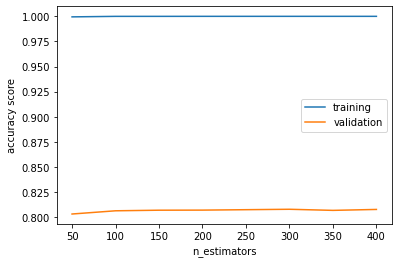

In [40]:
# Visualize validation curve of best n_estimators
plt.plot(estimators, train_acc, label='training')
plt.plot(estimators, val_acc, label='validation')
plt.xlabel('n_estimators')
plt.ylabel('accuracy score')
plt.legend();

**Finding best max_sample**
- This is being done with best n_estimators being used in model iterations

In [57]:
# Determine different sample sizes to test
samples = np.arange(0.2, 1, 0.1)

# Empty lists to put accuracies into
train_acc = []
val_acc = []

# Test out each different sample size in samples
for sample in samples:
    tree_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(strategy='mean'),
      RandomForestClassifier(n_estimators = 300,
                             n_jobs=-1,
                             random_state=42,
                             max_samples=sample)
  )
    tree_model.fit(X_train, y_train)
    
    # Save each iteration's results into lists
    train_acc.append(tree_model.score(X_train, y_train))
    val_acc.append(tree_model.score(X_val, y_val))

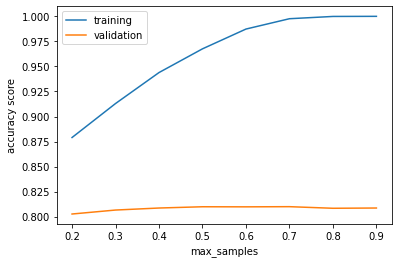

In [58]:
# Visualize validation curve of best max_sample
plt.plot(samples, train_acc, label='training')
plt.plot(samples, val_acc, label='validation')
plt.xlabel('max_samples')
plt.ylabel('accuracy score')
plt.legend();

**Finding best min_samples_leaf**
- This is being done with best hyperparameters being used in model iterations

In [181]:
# Determine different samples leaf sizes to test
leafs = np.arange(1, 40, 2)

# Empty lists to put accuracies into
train_acc = []
val_acc = []

# Test out each different samples leaf sizes in leafs
for leaf in leafs:
    tree_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(strategy='mean'),
      RandomForestClassifier(n_estimators = 300,
                             n_jobs=-1,
                             random_state=42,
                             max_samples = 0.7,
                             min_samples_leaf = leaf)
  )
    tree_model.fit(X_train, y_train)
    
    # Save each iteration's results into lists
    train_acc.append(tree_model.score(X_train, y_train))
    val_acc.append(tree_model.score(X_val, y_val))

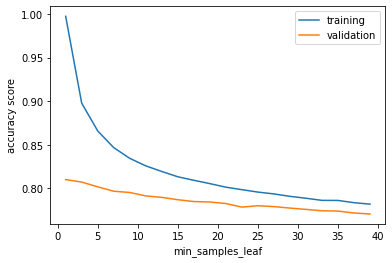

In [182]:
# Visualize validation curve of best min_samples_leaf
plt.plot(leafs, train_acc, label='training')
plt.plot(leafs, val_acc, label='validation')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy score')
plt.legend();

 ## Create Kaggle Submission

In [18]:
# Read in test data
X_test = wrangle(DATA_PATH+'waterpumps/test_features.csv')

# Make predictions on test data with model
predictions = rf_model.predict(X_test)

# Put predictions in correct format for submission
sample_submission = X_test.assign(status_group = predictions)

sample_submission = sample_submission[['status_group']]

# Create csv file to submit to Kaggle
sample_submission.to_csv('sample_submission.csv')

# Take a look at sample_submission
sample_submission_df = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv').set_index('id')

sample_submission_df.head()

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,functional
49871,functional


## Communicate Results

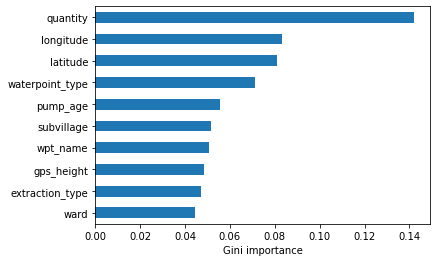

In [11]:
# Get importance of each feature
importances = rf_model.named_steps['randomforestclassifier'].feature_importances_

# Get names of each feature
features = X_train.columns

# Make a series that combines the importance features and their names
feat_imp = pd.Series(importances, index = features).sort_values()

# Visualize the importances
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel('Gini importance');